In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ARIMA
ARIMA = Auto-Regressive Integrated Moving Average. It is a class of model that captures a suite of different standard temporal structures in time series data:

- __AR__: Autoregression. Use the dependent relationship between an observation and some number of lagged observations.
- __I__: Integrated. Use differencing of raw observations in order to make the time series ***stationary***.
- __MA__: Moving Average. Use the dependency between an observation and a residual error from a moving average model applied to lagged observations. It corrects future forecasts based on errors made on recent forecasts.

# Dataset
For the univariate time-series analysis example, I'm going to use dataset [The total generation of electricity by the U.S. electric industry (monthly data for the period Jan. 1985 – Oct. 1996)](https://datamarket.com/data/set/22wj/the-total-generation-of-electricity-by-the-us-electric-industry-monthly-data-for-the-period-jan-1985-oct-1996-for-recent-data-click-here#!ds=22wj&display=line) downloaded from [Time Series Data Library](https://datamarket.com/data/list/?q=)

In [2]:
# import univariate time-series data
data = pd.read_csv('./dataset/the-total-generation-of-electric.csv', 
                   names=['month', 'generation'], 
                   index_col='month',
                   header=0)

In [3]:
# check missing values
data.isnull().sum()

generation    0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 1985-01 to The total generation of electricity by the U.S. electric industry (monthly data for the period Jan. 1985 ? Oct. 1996) For recent data
Data columns (total 1 columns):
generation    143 non-null object
dtypes: object(1)
memory usage: 2.2+ KB


In [5]:
# the last index is strange. take a look at the last rows
data.tail()

,generation
month,
1996-07,288.94
1996-08,290.16
1996-09,250.69
1996-10,240.80
The total generation of electricity by the U.S. electric industry (monthly data for the period Jan. 1985 ? Oct. 1996) For recent data,click here


In [6]:
# so the original csv file contains comments at the end. delete the last row
data.drop(data.tail(1).index, inplace=True)

In [7]:
# convert index to datetime index and convert generation to float
data.index = pd.to_datetime(data.index)
data.generation  = data.generation.astype(np.float)

In [8]:
data.describe()

,generation
count,142.000000
mean,231.089366
std,24.372480
min,184.880000
25%,214.212500
50%,226.730000
75%,246.252500
max,304.710000


# EDA

## Decomposition
The decomposition of time series is a statistical task that deconstructs a time series into several components, each representing one of the underlying categories of patterns. With statsmodels we will be able to see the trend, seasonal, and residual components of our data.

/Users/xinyue/anaconda2/envs/py36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


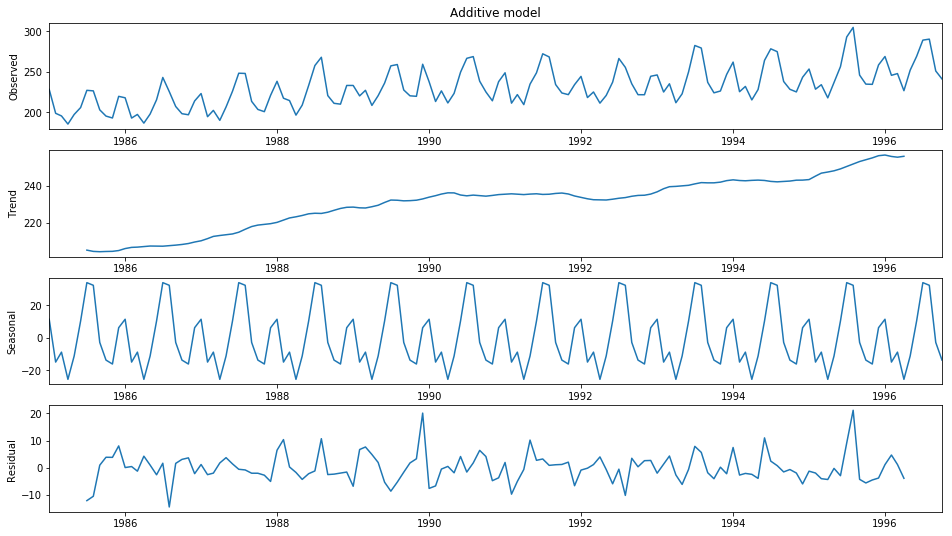

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates

result = seasonal_decompose(data, model='additive') # multiplicative
fig, ax = plt.subplots(figsize=(16, 9))

plt.subplot(411)
plt.title('Additive model')
plt.plot(result.observed)
plt.ylabel('Observed')
plt.xlim([data.index.min(), data.index.max()])

plt.subplot(412)
plt.plot(result.trend)
plt.ylabel('Trend')
plt.xlim([data.index.min(), data.index.max()])

plt.subplot(413)
plt.plot(result.seasonal)
plt.ylabel('Seasonal')
plt.xlim([data.index.min(), data.index.max()])

plt.subplot(414)
plt.plot(result.resid)
plt.ylabel('Residual')
plt.xlim([data.index.min(), data.index.max()])

plt.show()

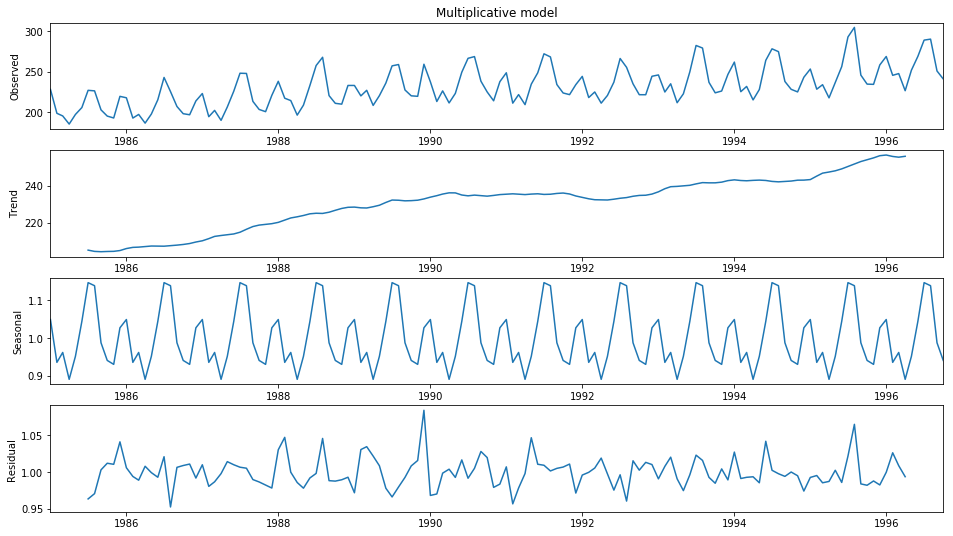

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates

result = seasonal_decompose(data, model='multiplicative') # multiplicative
fig, ax = plt.subplots(figsize=(16, 9))

plt.subplot(411)
plt.title('Multiplicative model')
plt.plot(result.observed)
plt.ylabel('Observed')
plt.xlim([data.index.min(), data.index.max()])

plt.subplot(412)
plt.plot(result.trend)
plt.ylabel('Trend')
plt.xlim([data.index.min(), data.index.max()])

plt.subplot(413)
plt.plot(result.seasonal)
plt.ylabel('Seasonal')
plt.xlim([data.index.min(), data.index.max()])

plt.subplot(414)
plt.plot(result.resid)
plt.ylabel('Residual')
plt.xlim([data.index.min(), data.index.max()])

plt.show()

The plots suggeste that the time series has an unward trend and clear seasonal pattern. 

## ACF and PACF
Autocorrelation: correlation of the time series observations with previous timesteps (lags).

In ACF and PACD, confidence intervals (CI) are drawn as a cone. By default, this is set to a 95% CI, suggesting that correlation values outside of this code are very likely a correlation. This can be changed by adjusting the alpha parameter in the plot function.

### ACF
AutoCorrelation Function: a plot of the autocorrelation of a time series by lag.

- For the AR(k) process, we'd expect the ACF to be strong to a lag of k and the inertia of that relationship would carry on to subsequent lag values, trailing off at some point as the effect was weakened.
- For the MA(k) process, we'd expect the ACF to show a strong correlation with recent values up to the lag of k, then a sharp decline to low or no correlation. By definition, this is how the process was generated.

### PACF
Partial AutoCorrelation Function: a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed. 

The autocorrelation for an observation and an observation at a prior time step is comprised of both the ***direct correlation*** and ***indirect correlations***. The partial autocorrelation at lag k is the correlation that results **after** removing the effect of any correlations due to the terms at *shorter* lags. The PACF seeks to remove these indirect correlations, i.e. the PACF only describes the ***direct*** relationship between an observation and its lag, suggesting that there would be no correlation for lag values beyond k.

- For the AR(k) process, there would be no correlation for lag values beyond k.
- For the MA(k) process, we'd expect the PACF to show a strong relationship to the lag and a trailing off of correlation from the lag onwards.

## Dickey-Fuller test
Test if the time series is stationary or not by testing the presence of a unit root. 
H0 = time series is non-stationary
Reject H0 if p_value > 0.05

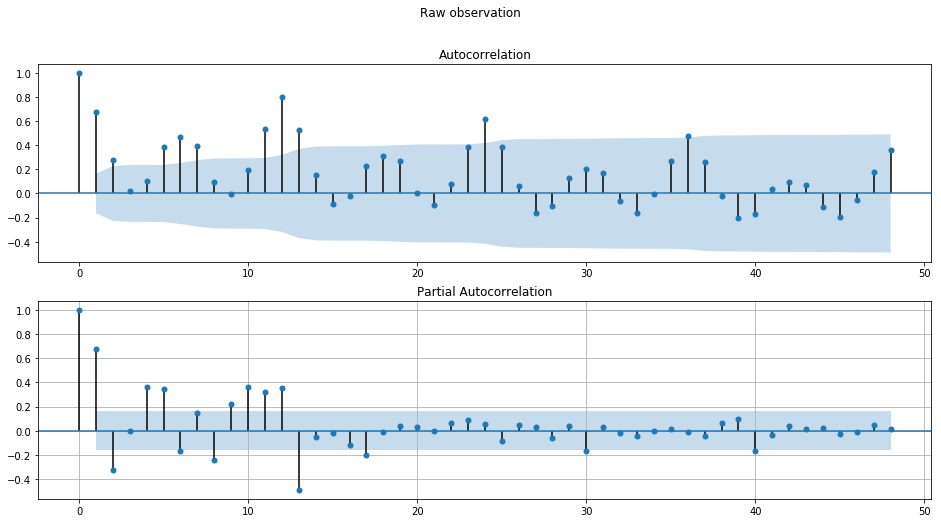

Dickey-Fuller test = 0.8541. The time series is non-stationary


In [11]:
# ACF and PCF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
fig = plt.figure(figsize=(16, 8))
acf_ax = plt.subplot(211)
pacf_ax = plt.subplot(212)
plot_acf(data, lags=48, ax=acf_ax)
plot_pacf(data, lags=48, ax=pacf_ax)
fig.suptitle('Raw observation')
plt.grid(True)
plt.show()

p_value = adfuller(data.generation)[1]
result = 'stationary' if p_value <= 0.05 else 'non-stationary'
print('Dickey-Fuller test = {:.4f}. The time series is {}'.format(p_value, result))

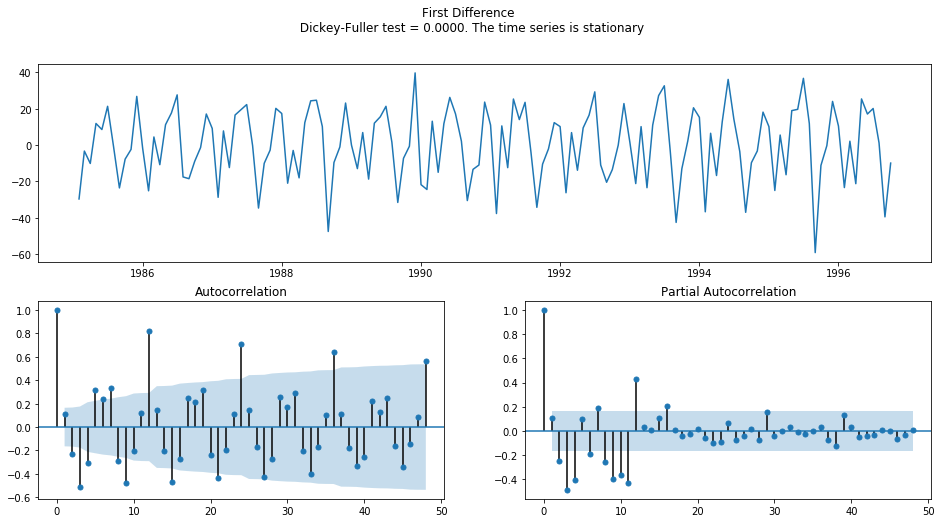

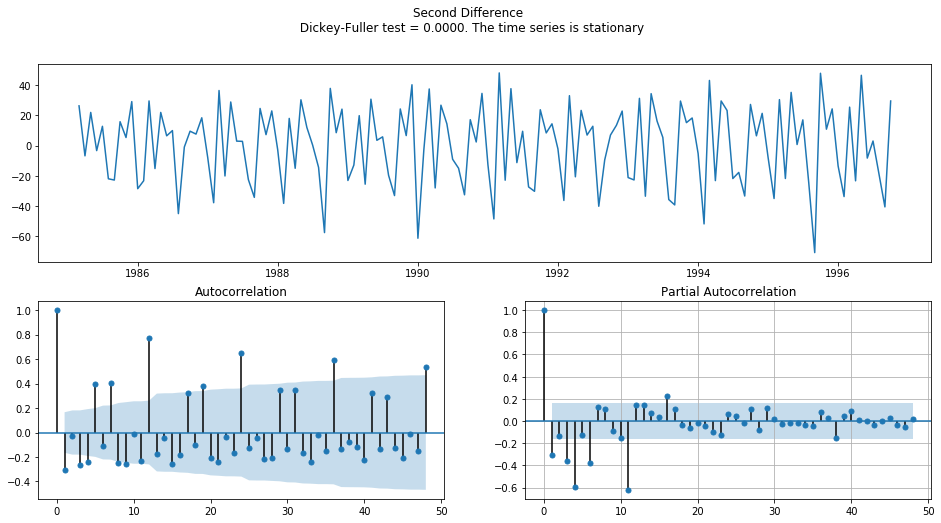

In [14]:
# ACF and PCF
# First difference
data_diff1 = data.generation - data.generation.shift(1)
p_value1 = adfuller(data_diff1[1:])[1]
result1 = 'stationary' if p_value1 <= 0.05 else 'non-stationary'

# Second difference
data_diff2 = data_diff1[1:] - data_diff1[1:].shift(1)
p_value2 = adfuller(data_diff2[1:])[1]
result2 = 'stationary' if p_value2 <= 0.05 else 'non-stationary'
data_diff2 = data_diff1[1:] - data_diff1[1:].shift(1)

fig1 = plt.figure(figsize=(16, 8))
ts_ax = plt.subplot2grid((2, 2), (0, 0), colspan=2)
acf_ax = plt.subplot2grid((2, 2), (1, 0))
pacf_ax = plt.subplot2grid((2, 2), (1, 1))
ts_ax.plot(data_diff1[1:])
plot_acf(data_diff1[1:], lags=48, ax=acf_ax)
plot_pacf(data_diff1[1:], lags=48, ax=pacf_ax)
fig1.suptitle('First Difference \n Dickey-Fuller test = {:.4f}. The time series is {}'.format(p_value1, result1))
plt.show()

fig2 = plt.figure(figsize=(16, 8))
ts_ax = plt.subplot2grid((2, 2), (0, 0), colspan=2)
acf_ax = plt.subplot2grid((2, 2), (1, 0))
pacf_ax = plt.subplot2grid((2, 2), (1, 1))
ts_ax.plot(data_diff2[1:])
plot_acf(data_diff2[1:], lags=48, ax=acf_ax)
plot_pacf(data_diff2[1:], lags=48, ax=pacf_ax)
fig2.suptitle('Second Difference \n Dickey-Fuller test = {:.4f}. The time series is {}'.format(p_value2, result2))
plt.grid(True)
plt.show()

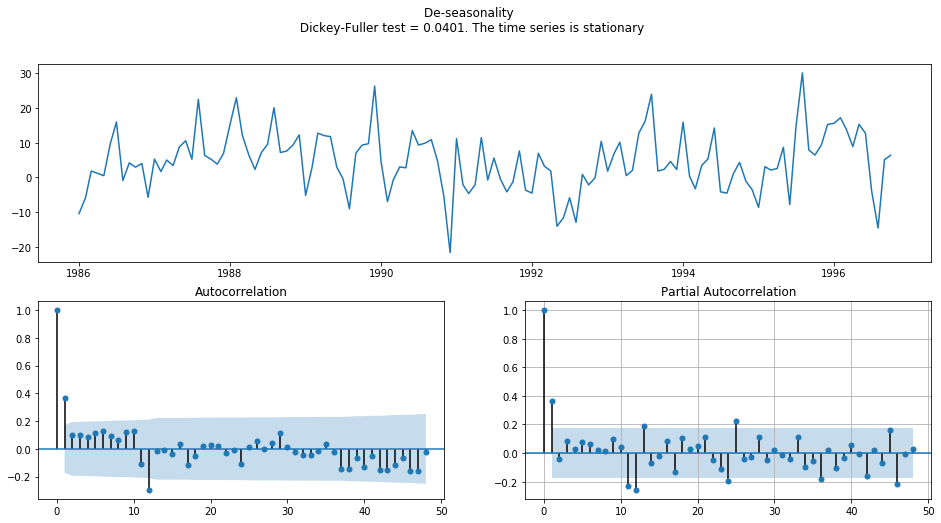

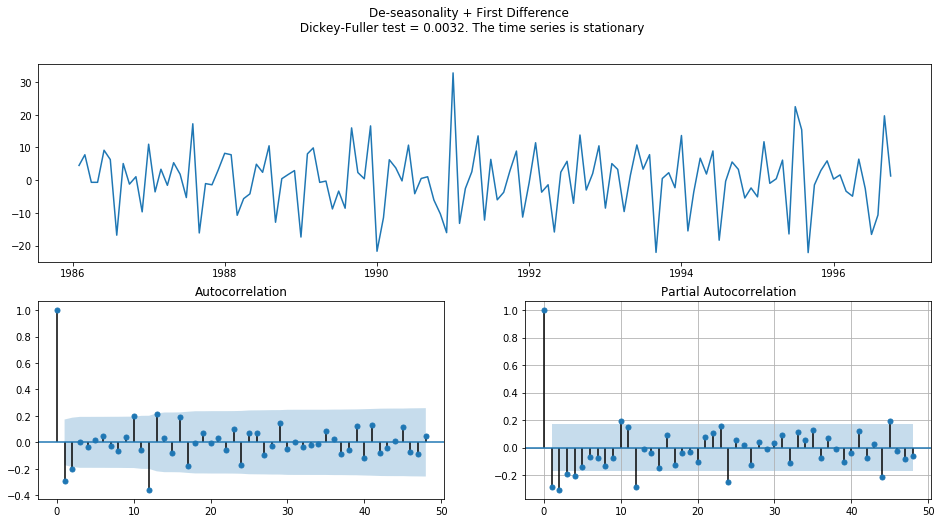

In [15]:
# ACF and PCF 
# remove visible seasonality
data_diff12 = data.generation - data.generation.shift(12)
p_value12 = adfuller(data_diff12[12:])[1]
result12 = 'stationary' if p_value12 <= 0.05 else 'non-stationary'
# add first difference
data_diff13 = data_diff12[1:] - data_diff12[1:].shift(1)
p_value13 = adfuller(data_diff13[12:])[1]
result13 = 'stationary' if p_value13 <= 0.05 else 'non-stationary'

fig = plt.figure(figsize=(16, 8))
ts_ax = plt.subplot2grid((2, 2), (0, 0), colspan=2)
acf_ax = plt.subplot2grid((2, 2), (1, 0))
pacf_ax = plt.subplot2grid((2, 2), (1, 1))
ts_ax.plot(data_diff12[12:])
plot_acf(data_diff12[12:], lags=48, ax=acf_ax)
plot_pacf(data_diff12[12:], lags=48, ax=pacf_ax)
fig.suptitle('De-seasonality \n Dickey-Fuller test = {:.4f}. The time series is {}'.format(p_value12, result12))
plt.grid(True)
plt.show()

# ACF and PCF after removing visible seasonality

fig = plt.figure(figsize=(16, 8))
ts_ax = plt.subplot2grid((2, 2), (0, 0), colspan=2)
acf_ax = plt.subplot2grid((2, 2), (1, 0))
pacf_ax = plt.subplot2grid((2, 2), (1, 1))
ts_ax.plot(data_diff13[12:])
plot_acf(data_diff13[12:], lags=48, ax=acf_ax)
plot_pacf(data_diff13[12:], lags=48, ax=pacf_ax)
fig.suptitle('De-seasonality + First Difference \n Dickey-Fuller test = {:.4f}. The time series is {}'.format(p_value13, result13))
plt.grid(True)
plt.show()

# Simple Seasonal ARIMA Model
Notation: `SARIMAX(p, d, q)(P, D, Q)m`
- `p`: the AR term, lag order, the number of lag observations included in the model.
    - Assumption: current series values depend on its previous values with some lag(s). 
    - The maximum lag in the model is p. 
    - Look at __PACF__ plot to determine the initial p: the biggest significant lag after which most other lags are becoming not significant.
- `d`: the I term, degree of differencing (0, 1, 2), the number of times that the raw observations are differenced
    - To make data stationary
- `q`: the MA term, moving average, the size of the moving average window. 
    - Assumption: current error depends on the previous with some lag(s)
    - Model the error of the time series
    - Use __ACF__ plot to find the initial value
- `P`: order of autoregression for seasonal component
    - Can be derived from PACF, but need to look at the number of significant lags, which are the multiples of the season period length, for example, if the period equals 24 and looking at PACF we see 24-th and 48-th lags are significant, that means initial P should be 2.
- `D`: order of seasonal integration. Can be equal to 1 or 0, depending on whether seasonal differences were applied or not
- `Q`: order of moving average for the seasonal component
    - Use ACF

## Hyperparameter

- `p`: from PACF, p is likely to be 1 as it's the last significant lag on PACF after which most others are becoming not significant.
- `d`: the time series becomes stable after first difference. Let d=1
- `q`: from ACF, q is likely to be 1 or 12

- `P`: from PACF, the 12-th lag is significant, and the 24-th is somewhat significant. So P=1 or P=2
- `D`: 1. We performed seasonal differentiation
- `Q`: from ACF, the 12th lag is significant, so Q=1

In [16]:
# run a single model
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# d must be an integer, 
# p and q may either be integers so that all lags up to those orders are included
# or iterables giving specific AR and/or MA lags to include 
p, d, q = 1, 1, 1

# P, D, Q are the same as p, d, q but for the seasonal component
# s is an integer giving the periodicity (number of priods in season). 4 is for quarterly data and 12 for monthly
P, D, Q, s = 1, 1, 1, 12

# fit model
model = SARIMAX(data, order=(p, d, q), seasonal_order=(P, D, Q, s))
fit = model.fit(disp=0) # turn off debugging info
print(fit.summary())

                                 Statespace Model Results                                 
Dep. Variable:                         generation   No. Observations:                  142
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -428.867
Date:                            Wed, 23 Jan 2019   AIC                            867.734
Time:                                    01:01:00   BIC                            882.513
Sample:                                01-01-1985   HQIC                           873.740
                                     - 10-01-1996                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2968      0.119      2.499      0.012       0.064       0.530
ma.L1         -0.8768      0.086   

# Selecting the best model
## AIC
The Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a given set of data. 

Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models.

The AIC value will allow us to compare how well a model fits the data and takes into account the complexity of a model, so models that have a better fit while using fewer features will receive a better (lower) AIC score than similar models that utilize more features.

In [17]:
# run models iteratively to select the best parameters
from itertools import product 
from tqdm import tqdm_notebook as tqdm # progress bar 
# set a params grid
ps = range(0, 3)
d = 1
qs = range(0, 2)
Ps = range(0, 3)
D = 1
Qs = range(0, 2)
s = 12

# create a list with all the possible combinations of parameters
parameters = list(product(ps, qs, Ps, Qs))

In [18]:
def optimizeSARIMA(parameters, d, D, s):
    '''
    Return datafram with parameters and corresponding AIC
    '''
    result = []
    best_aic = float('inf')
    
    for param in tqdm(parameters):
        try:
            model = SARIMAX(data, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            # if model with tried combination failed to converge
            continue
        
        aic = model.aic
        # save best model, AIC and parameters combination
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        result.append([param, model.aic])
    
    result_df = pd.DataFrame(result)
    result_df.columns = ['parameters', 'aic']
    result_df = result_df.sort_values(by='aic', ascending=True).reset_index(drop=True)

    return result_df

In [19]:
result_df = optimizeSARIMA(parameters, d, D, s)

In [20]:
p, q, P, Q = result_df.parameters[0]
best_model = SARIMAX(data, order=(p, d, q), seasonal_order=(P, D, Q, s)).fit(disp=-1)
print(best_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                         generation   No. Observations:                  142
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -429.305
Date:                            Wed, 23 Jan 2019   AIC                            866.610
Time:                                    01:01:24   BIC                            878.433
Sample:                                01-01-1985   HQIC                           871.415
                                     - 10-01-1996                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2776      0.102      2.726      0.006       0.078       0.477
ma.L1         -0.8650      0.078   

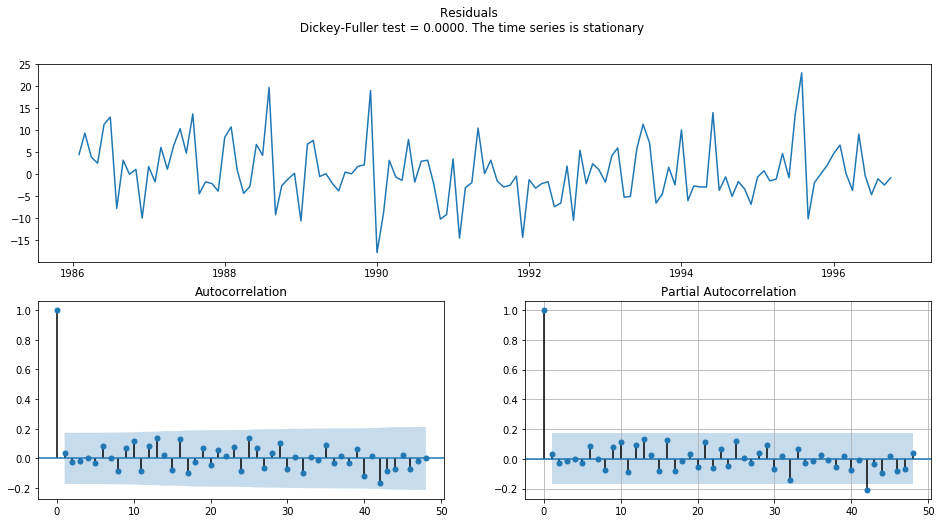

In [21]:
# plot the residuals
residuals = pd.DataFrame(best_model.resid)
p_value = adfuller(residuals[0].values[13:])[1]
result = 'stationary' if p_value <= 0.05 else 'non-stationary'

fig = plt.figure(figsize=(16, 8))
ts_ax = plt.subplot2grid((2, 2), (0, 0), colspan=2)
acf_ax = plt.subplot2grid((2, 2), (1, 0))
pacf_ax = plt.subplot2grid((2, 2), (1, 1))
ts_ax.plot(residuals[13:])
plot_acf(residuals[13:], lags=48, ax=acf_ax)
plot_pacf(residuals[13:], lags=48, ax=pacf_ax)
fig.suptitle('Residuals \n Dickey-Fuller test = {:.4f}. The time series is {}'.format(p_value, result))
plt.grid(True)
plt.show()

The residuals are stationary and no apparent autocorrelations.

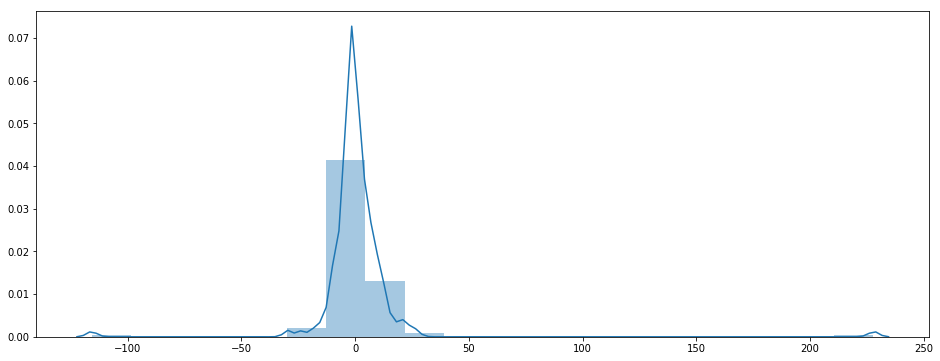

In [22]:
plt.figure(figsize=(16, 6))
sns.distplot(residuals, bins=20)
plt.show()

In [23]:
print(residuals.describe())

                0
count  142.000000
mean     1.186971
std     22.903270
min   -115.709508
25%     -3.132036
50%     -0.645436
75%      4.435430
max    227.860000


In [24]:
# rolling forecast
X = data.generation.values
cut = int(len(X) * 0.66)
train, test = X[:cut], X[cut:]
history = [x for x in train]
predictions = []
for t in range(len(test)):
    model = SARIMAX(history, order=(p, d, q), seasonal_order=(P, D, Q, s)).fit(disp=-1)
    output = model.forecast()  # output = [forecast, stderr, confidence_interval]
    y_pred = output[0]  
    predictions.append(y_pred)
    obs = test[t]
    history.append(obs)
#     print('predicted={:.2f}, expected={:.2f}'.format(y_pred, obs))

Test MSE: 41.459


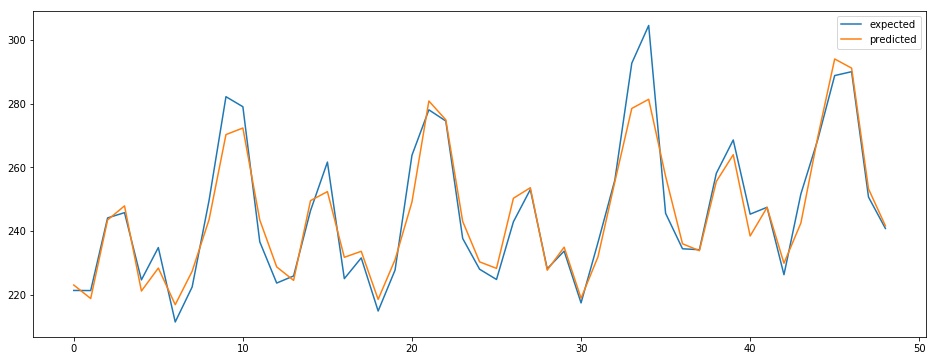

In [25]:
error = mean_squared_error(test, predictions)
print('Test MSE: {:.3f}'.format(error))
plt.figure(figsize=(16, 6))
plt.plot(test)
plt.plot(predictions)
plt.legend(['expected', 'predicted'])
plt.show()

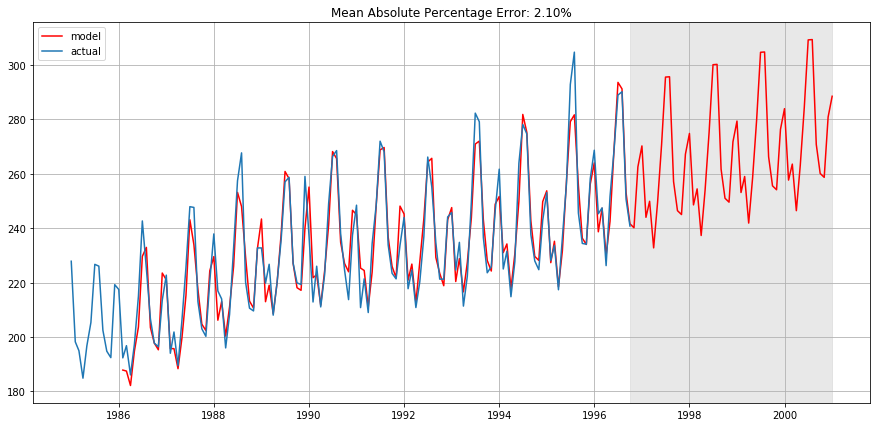

In [26]:
# alternatively use the function adapted from
# https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-9-time-series-analysis-in-python-a270cb05e0b3
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def plotSARIMA(series, model, n_steps):
    """
        Plots model vs predicted values
        
        series - dataset with timeseries
        model - fitted SARIMA model
        n_steps - number of steps to predict in the future
        
    """
    # adding model values
    data = series.copy()
    data.columns = ['actual']
    data['arima_model'] = model.fittedvalues
    # making a shift on s+d steps, because these values were unobserved by the model
    # due to the differentiating
    data['arima_model'][:s+d] = np.NaN
    
    # forecasting on n_steps forward 
    forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps)
    forecast = data.arima_model.append(forecast)
    # calculate error, again having shifted on s+d steps from the beginning
    error = mean_absolute_percentage_error(data['actual'][s+d:], data['arima_model'][s+d:])

    plt.figure(figsize=(15, 7))
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
    plt.plot(forecast, color='r', label="model")
    plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
    plt.plot(data.actual, label="actual")
    plt.legend()
    plt.grid(True)
    plt.show()
    
plotSARIMA(data, best_model, 50)

## Alternative tuning method: Pyramid auto_arima
The pyramid-arima library for grid search for params and fitting. This library contains an auto_arima function that allows us to set a range of p,d,q,P,D,and Q values and then fit models for all the possible combinations. Then the model will keep the combination that reported back the best AIC value.

In [ ]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(data, start_p=0, start_q=0,
                           max_p=3, max_q=2, m=12,
                           start_P=0, start_Q=0,
                           max_P=3, max_Q=2,
                           seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           stepwise=True)
print(stepwise_model.aic())